# Important links
#### [Our World in Data website](https://ourworldindata.org/coronavirus-source-data)
#### [Our World in Data GitHub](https://github.com/owid/covid-19-data/tree/master/public/data/)

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import wget

from numpy import linspace

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('ggplot')

In [41]:
def plot_owid_covid(country_iso: str = None,
                    path: str = './owid-covid-data.csv',
                    plot_saved: bool = False,
                    save: bool = True):
    """
    Plots some of the COVID-19 data for the given country or the whole world,
    can also download the latest data.

    Parameters
    ----------
    country_iso : str, optional
        International 3-letter country ISO code. If None, plots for the whole
        dataset.

    path: str, default: './owid-covid-data.csv'
        Path for the downloaded dataset if offline. If `plot_saved` is True,
        the path to saved data is expected.

    plot_saved : bool, default: False
        To prefer saved dataset for the graphs. `path` argument must be valid.

    save : bool, default: True
        To download and save the dataset. Overwrites the existing `path`.
    """
    url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
    save = False if plot_saved else save
    if save:
        try:
            os.remove(path)
        except:
            pass
        path = wget.download(url, path)
    if save or plot_saved:
        data = pd.read_csv(path, parse_dates=['date'], low_memory=False)
    else:
        data = pd.read_csv(url, parse_dates=['date'], low_memory=False) 

    # for any parameters
    if country_iso and country_iso not in data.iso_code.unique():
        raise ValueError(f"Incorrect ISO code: '{country_iso}'")

    # key columns for the graphs
    cols = ['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths']

    # selecting country or the whole world
    if not country_iso:
        country_iso = 'OWID_WRL'
        country = 'the world'
    else:
        country = data[data.iso_code == country_iso].location.iloc[0]

    # selecting key columns
    data = data[(data.iso_code == country_iso) & (data.total_cases != 0)][cols]

    # plotting data
    fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(8, 14))
    ax0.set_title(f'Cases and deaths of COVID-19 in {country} by date', y=1.05)
    ax1.set_xlabel('Date')
    red, blue = plt.cm.RdBu([0.01, 0.99])

    # total cases
    ax0.plot(data.date, data.total_cases, color=blue)
    plt.setp(ax0.get_xticklabels(), rotation=45)

    # new cases
    ax2 = ax0.twinx()
    ax2.plot(data.date, data.new_cases, color=red)
    ax2.grid(None)

    # total deaths
    ax1.plot(data.date, data.total_deaths, color=blue)
    plt.setp(ax1.get_xticklabels(), rotation=45)

    # new deaths
    ax3 = ax1.twinx()
    ax3.plot(data.date, data.new_deaths, color=red)
    ax3.grid(None)

    # prettifying plots
    for ax, ylabel, color in zip([ax0, ax1, ax2, ax3],
                                 ['Total cases',
                                  'Total deaths',
                                  'New cases',
                                  'New deaths'],
                                 [blue, blue, red, red]):
        ax.set_ylabel(ylabel, color=color)
        ax.tick_params('y', colors=color)
        ax.set_ylim(0)
        ax.set_yticks(linspace(*ax.get_ybound(), 10))

    plt.show(block=False)

C:\Program Files\Python38\lib\site-packages\matplotlib\lines.py:1171: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or np.any(self._markeredgecolor != ec)):


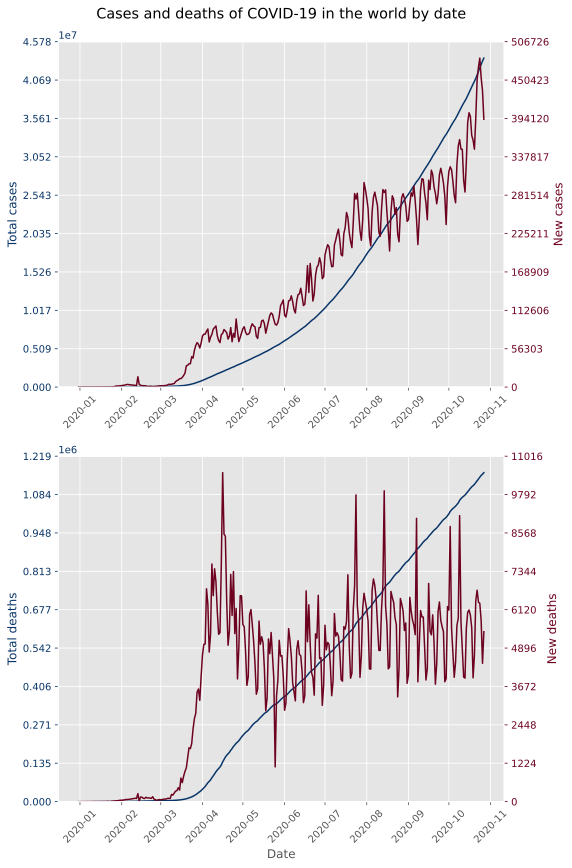

In [43]:
# r'C:\Users\Michael\Documents\Python\Scripts\my_projects\covid\owid-covid-data.csv'
plot_owid_covid()

C:\Program Files\Python38\lib\site-packages\matplotlib\lines.py:1171: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or np.any(self._markeredgecolor != ec)):


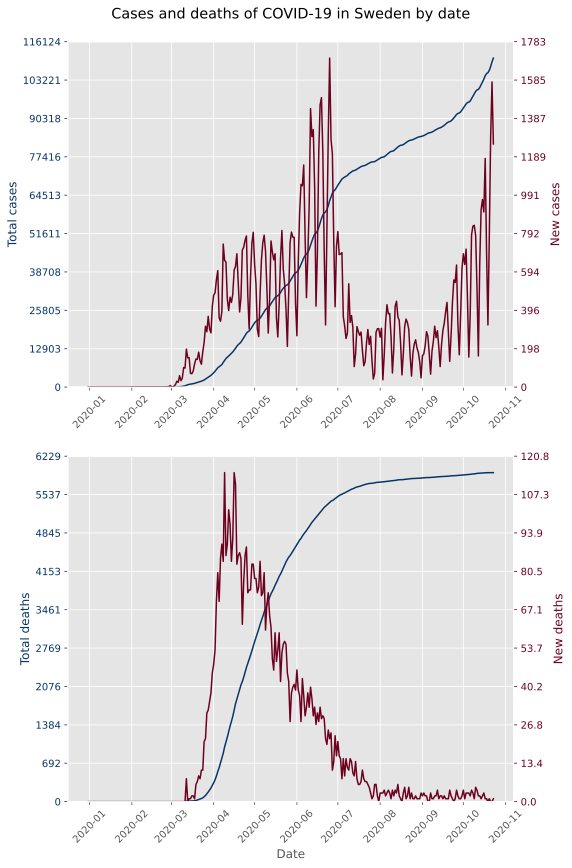

In [44]:
plot_owid_covid('SWE', plot_saved=True)

C:\Program Files\Python38\lib\site-packages\matplotlib\lines.py:1171: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or np.any(self._markeredgecolor != ec)):


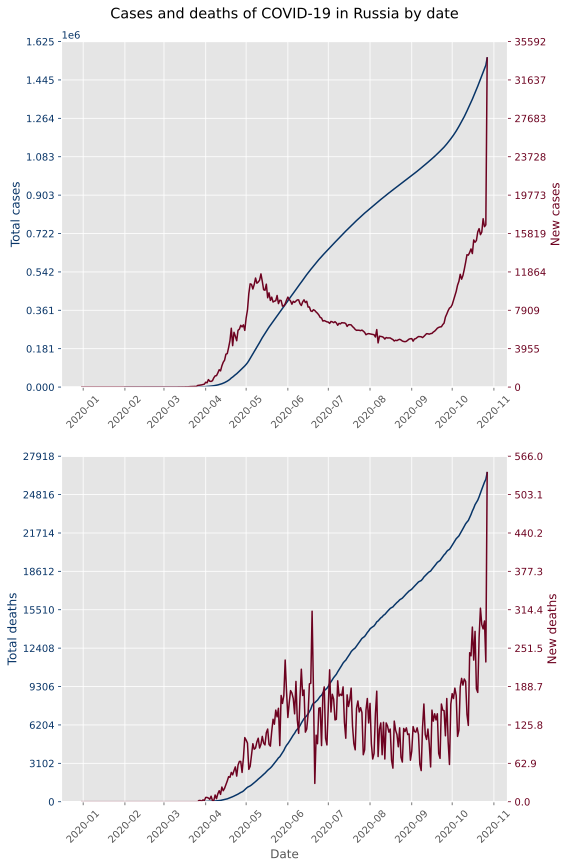

In [45]:
plot_owid_covid('RUS', plot_saved=True)

In [46]:
plot_owid_covid('provoking error')

ValueError: Incorrect ISO code: 'provoking error'